# Develop a predictive maintenance model using LSTM-RNN to forecast equipment failures, enabling proactive maintenance and reducing downtime.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
# Load your dataset
data = pd.read_csv('fraud.csv')
data.head()

,TransactionID,Amount,Time,Type,Location,CardHolder,IsFraud
0,1,120.75,1,Debit,Local,John Doe,0.0
1,2,50.00,2,Credit,International,Jane Smith,0.0
2,3,200.00,3,Debit,Local,Bob Johnson,0.0
3,4,30.25,4,Debit,Local,Alice Williams,0.0
4,5,500.50,5,Credit,International,Charlie Brown,1.0


In [3]:
# Data Preprocessing
data = data.drop(['TransactionID', 'CardHolder', 'Location'], axis=1)

# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Type'])

# Fill missing values (customize as needed)
data = data.fillna(method='ffill')

In [4]:
data.describe()

,Amount,Time,IsFraud,Type_Credit,Type_Debit
count,105.000000,105.000000,105.000000,105.000000,105.000000
mean,156.766667,53.000000,0.142857,0.400000,0.600000
std,133.783326,30.454885,0.351605,0.492248,0.492248
min,25.750000,1.000000,0.000000,0.000000,0.000000
25%,55.200000,27.000000,0.000000,0.000000,0.000000
50%,120.750000,53.000000,0.000000,0.000000,1.000000
75%,200.000000,79.000000,0.000000,1.000000,1.000000
max,500.500000,105.000000,1.000000,1.000000,1.000000


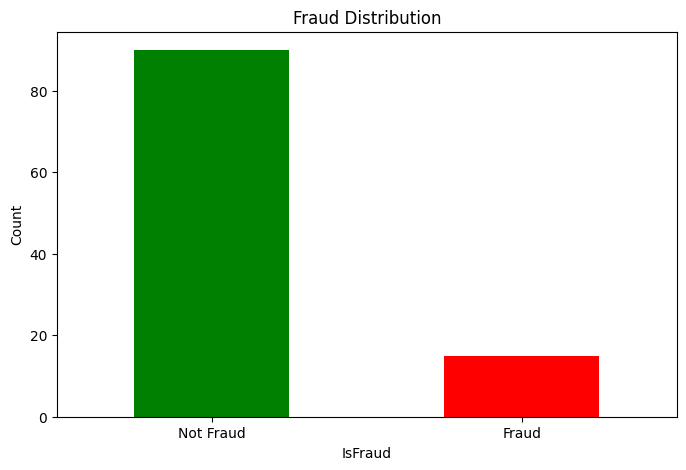

In [5]:
# Plot the distribution of 'IsFraud'
fraud_distribution = data['IsFraud'].value_counts()

plt.figure(figsize=(8, 5))
fraud_distribution.plot(kind='bar', color=['green', 'red'])
plt.title('Fraud Distribution')
plt.xlabel('IsFraud')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Fraud', 'Fraud'], rotation=0)
plt.show()

In [6]:
# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [7]:
# Create sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length, :-1])
        y.append(data[i+sequence_length, -1])
    return np.array(X), np.array(y)

sequence_length = 10  # Define sequence length
X, y = create_sequences(data_scaled, sequence_length)

In [8]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Model Architecture
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1, activation='sigmoid'))  # Binary classification, so use sigmoid activation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Model Training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50


2/2 [==============================] - 2s 379ms/step - loss: 0.6892 - accuracy: 0.6000 - val_loss: 0.6875 - val_accuracy: 0.5625
Epoch 2/50
2/2 [==============================] - 0s 89ms/step - loss: 0.6855 - accuracy: 0.6000 - val_loss: 0.6853 - val_accuracy: 0.5625
Epoch 3/50
2/2 [==============================] - 0s 38ms/step - loss: 0.6818 - accuracy: 0.6000 - val_loss: 0.6832 - val_accuracy: 0.5625
Epoch 4/50
2/2 [==============================] - 0s 40ms/step - loss: 0.6793 - accuracy: 0.6000 - val_loss: 0.6815 - val_accuracy: 0.5625
Epoch 5/50
2/2 [==============================] - 0s 37ms/step - loss: 0.6759 - accuracy: 0.6000 - val_loss: 0.6801 - val_accuracy: 0.5625
Epoch 6/50
2/2 [==============================] - 0s 40ms/step - loss: 0.6739 - accuracy: 0.6000 - val_loss: 0.6791 - val_accuracy: 0.5625
Epoch 7/50
2/2 [==============================] - 0s 41ms/step - loss: 0.6709 - accuracy: 0.6000 - val_loss: 0.6785 - val_accuracy: 0.5625
Epoch 8/50
2/2 [========

In [11]:
# Model Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

1/1 [==============================] - 0s 30ms/step - loss: 0.4350 - accuracy: 0.8947
Test Loss: 0.43498507142066956, Test Accuracy: 0.8947368264198303


In [12]:
# Predict on the test set
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 187ms/step


In [13]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 0.36107186703018224


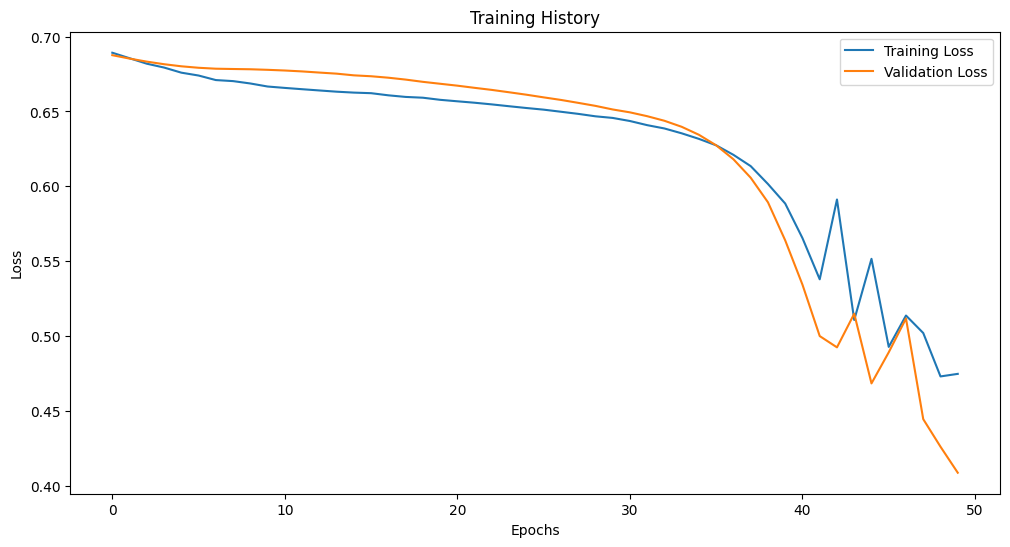

In [14]:
# Visualize Training History
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

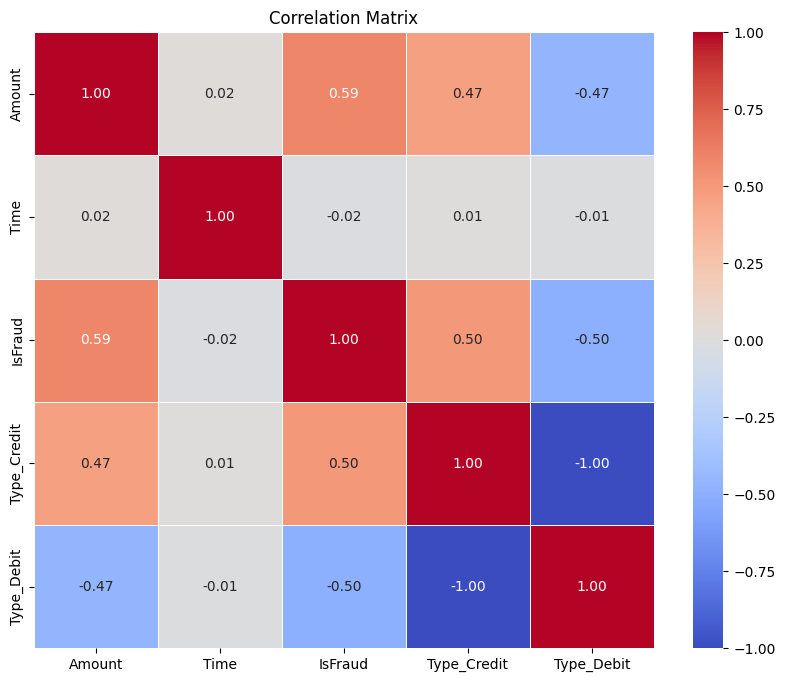

In [15]:
# Calculate the correlation matrix
import seaborn as sns

correlation_matrix = data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()